# 👋 Welcome to Ngoding "Exploratory Data Analysis"

Notebook ini dirancang untuk membantu Anda memahami dasar-dasar untuk melakukan explorasi data melalui data visualisasi

---

## 📚 Apa yang Akan Anda Pelajari?

Dalam pelatihan ini, Anda akan mempelajari:

- ✅ Memahami setiap jenis visualisasi dari
  - Bar Chart
  - Line Chart
  - Pie Chart
  - Stacked Bar Chart
  - Boxplot
  - Correlation Matrix
- ✅ Memahami membaca Python file yang berisi function
- ✅ Mempersingkat waktu dengan less code dari function

In [1]:
# !pip install -r "/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari/requirements_colab.txt"

In [2]:
# import library
import pandas as pd
import numpy as np
import os
import glob

import sys
sys.path.append('/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari/Materials')

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import collection_function as cus_viz

import warnings
warnings.filterwarnings('ignore')

In [3]:
# # Upload file from Google Drive

# from google.colab import files

# uploaded = files.upload()

In [4]:
# data = pd.read_csv("insurance.csv")

# display(data.info())
# data.head()

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/refs/heads/main/dataset/car_price.csv")
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Simple Data Visualisasi

### Bar Chart

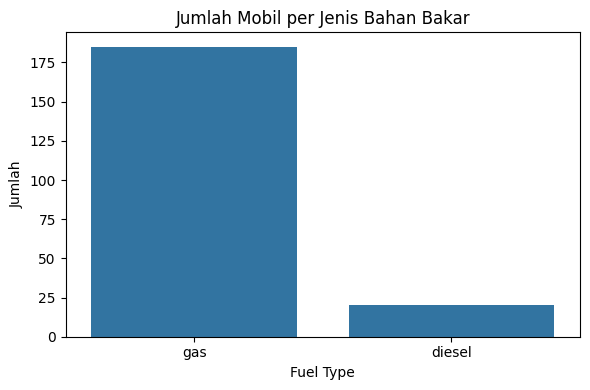

In [6]:
# Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='fueltype')
plt.title('Jumlah Mobil per Jenis Bahan Bakar')
plt.xlabel('Fuel Type')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

### Line Chart

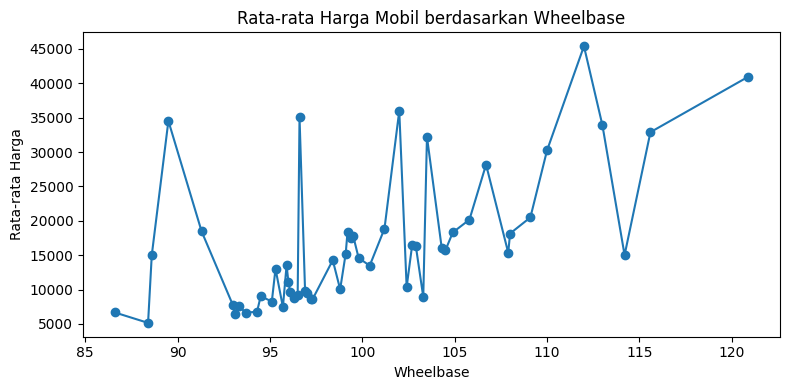

In [7]:
# Line Chart
wheelbase_avg = data.groupby('wheelbase')['price'].mean().sort_index()
plt.figure(figsize=(8, 4))
plt.plot(wheelbase_avg.index, wheelbase_avg.values, marker='o')
plt.title('Rata-rata Harga Mobil berdasarkan Wheelbase')
plt.xlabel('Wheelbase')
plt.ylabel('Rata-rata Harga')
plt.tight_layout()
plt.show()

### Pie Chart

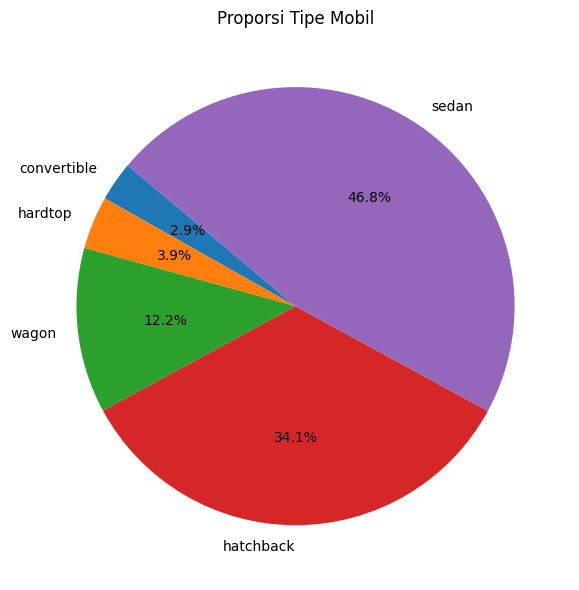

In [8]:
# Pie Chart
carbody_counts = data['carbody'].value_counts()
carbody_counts = carbody_counts.sort_values(ascending=True)
plt.figure(figsize=(6, 6))
plt.pie(carbody_counts, labels=carbody_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Tipe Mobil')
plt.tight_layout()
plt.show()

### Stacked Bar Chart

fueltype,diesel,gas
carbody,,
convertible,0,6
hardtop,1,7
hatchback,1,69
sedan,15,81
wagon,3,22


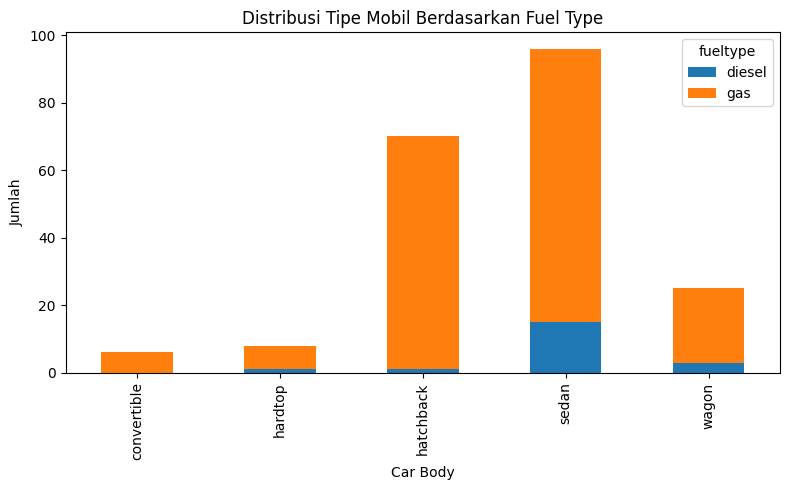

In [9]:
# Stacked Bar Chart
fuel_carbody = pd.crosstab(data['carbody'], data['fueltype'])
display(fuel_carbody)

fuel_carbody.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribusi Tipe Mobil Berdasarkan Fuel Type')
plt.xlabel('Car Body')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

### Boxplot

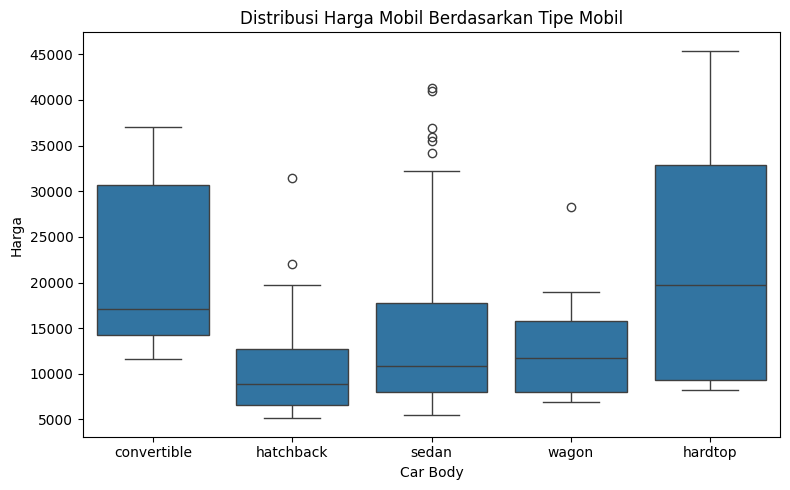

In [10]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='carbody', y='price')
plt.title('Distribusi Harga Mobil Berdasarkan Tipe Mobil')
plt.xlabel('Car Body')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

### Correlation Matrix

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.160959,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.129533,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.182942,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.168790,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.203129,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,-0.055909,0.573677,0.553173
stroke,0.160959,0.129533,0.182942,0.168790,0.203129,-0.055909,1.000000,0.080940,0.079443
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,0.080940,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.079443,0.808139,1.000000


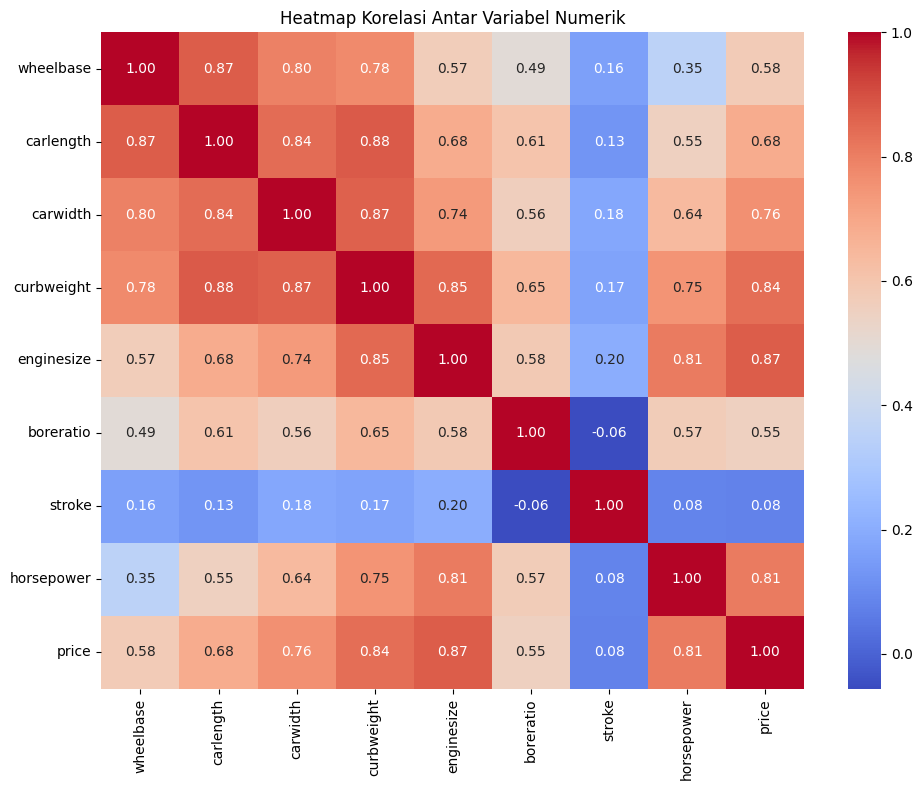

In [11]:
# Heatmap Correlation
numeric_cols = data.select_dtypes(include='number')

# selective columns
numeric_cols = numeric_cols[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower', 'price']]
corr_matrix = numeric_cols.corr()
display(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.tight_layout()
plt.show()

## Data Visualisasi with Function

### Bar Chart

,fueltype,CarName
1,gas,185
0,diesel,20


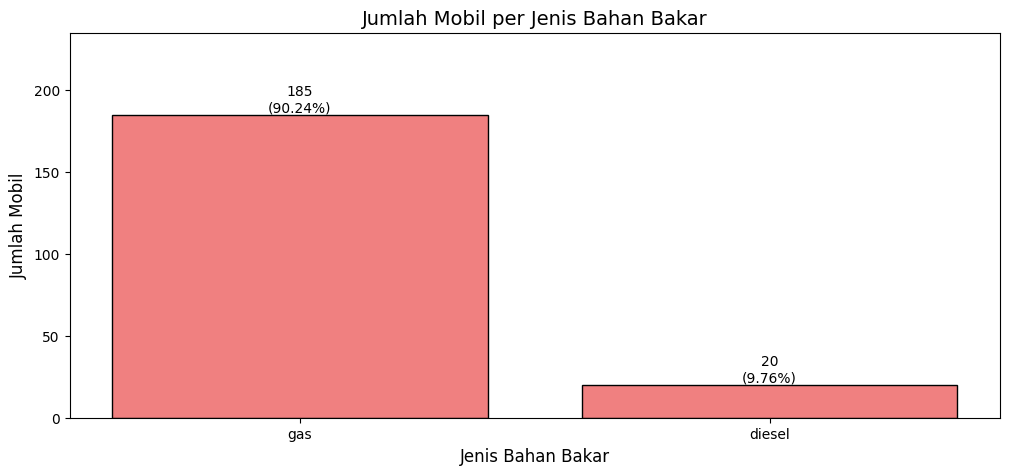

In [12]:
# bar chart

# data agreggation
q1 = cus_viz.simple_pivot(data=data, ind='fueltype', val='CarName', agg='count')
display(q1)

# visualisasi
cus_viz.bar_chart(data=q1, x_vals='fueltype', y_vals='CarName', title='Jumlah Mobil per Jenis Bahan Bakar', xlabel='Jenis Bahan Bakar', ylabel='Jumlah Mobil', ymax=50)

### Line Chart

,wheelbase,price
0,86.6,6667.000000
1,88.4,5151.000000
2,88.6,14997.500000
3,89.5,34528.000000
4,91.3,18449.000000
5,93.0,7689.000000
6,93.1,6435.000000
7,93.3,7603.000000
8,93.7,6626.400000
9,94.3,6785.000000


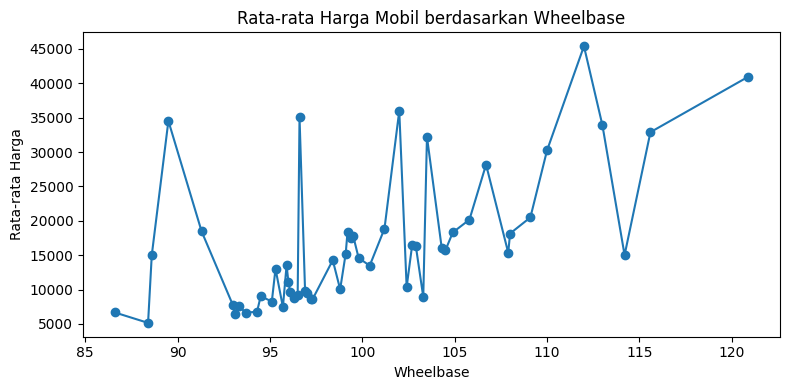

In [13]:
# Line chart

# data agreggation
q2 = cus_viz.simple_pivot(data=data, ind='wheelbase', val='price', agg='mean')
q2 = q2.sort_values(by='wheelbase', ascending=True)
display(q2)

# visualisasi
cus_viz.line_chart(q2, x_vals='wheelbase', y_vals='price', title='Rata-rata Harga Mobil berdasarkan Wheelbase', xlabel='Wheelbase', ylabel='Rata-rata Harga')

### Pie Chart

,carbody,CarName
3,sedan,96
2,hatchback,70
4,wagon,25
1,hardtop,8
0,convertible,6


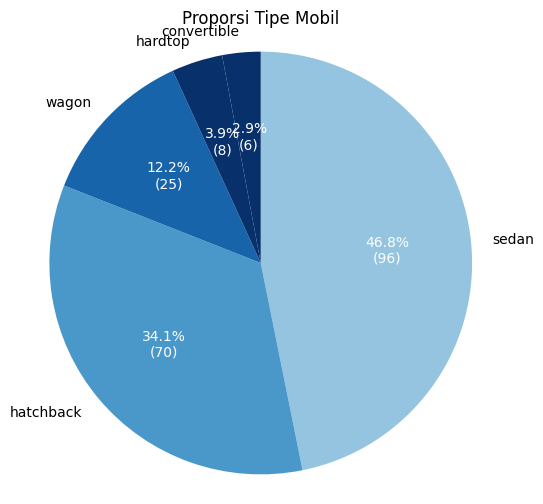

In [14]:
# Pie chart

# data agreggation
q3 = cus_viz.simple_pivot(data=data, ind='carbody', val='CarName', agg='count')
q3 = q3.sort_values(by='CarName', ascending=False)
display(q3)

# visualisasi
cus_viz.pie_chart(data=q3, val='CarName', cat='carbody', title='Proporsi Tipe Mobil')

### Stacked Bar Chart

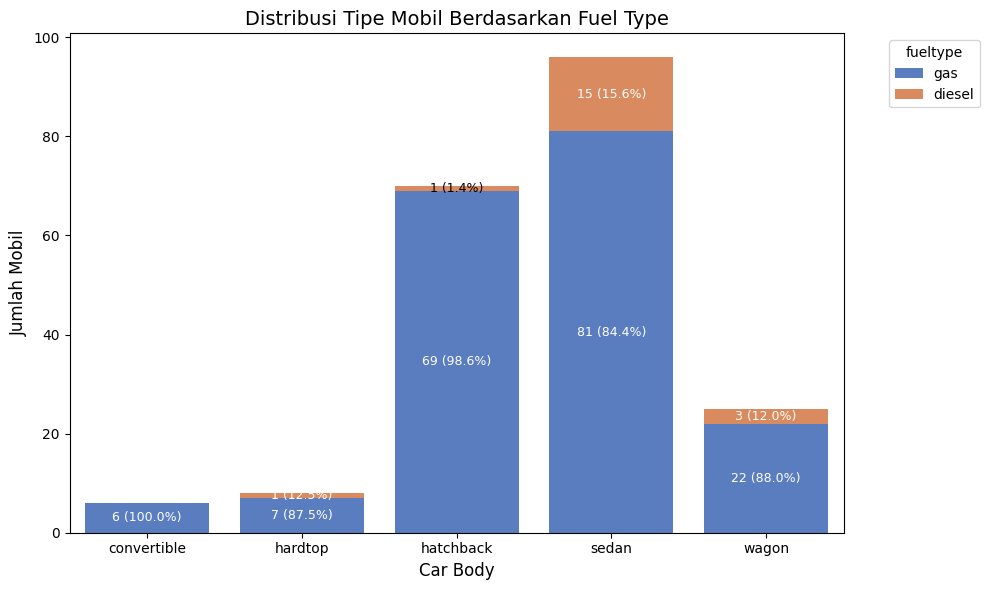

In [15]:
cus_viz.stacked_bar_chart(data=data, ind='carbody', col='fueltype', val='car_ID', title='Distribusi Tipe Mobil Berdasarkan Fuel Type',
                          xlabel='Car Body', ylabel='Jumlah Mobil', legend='fueltype')

### Correlation Matrix

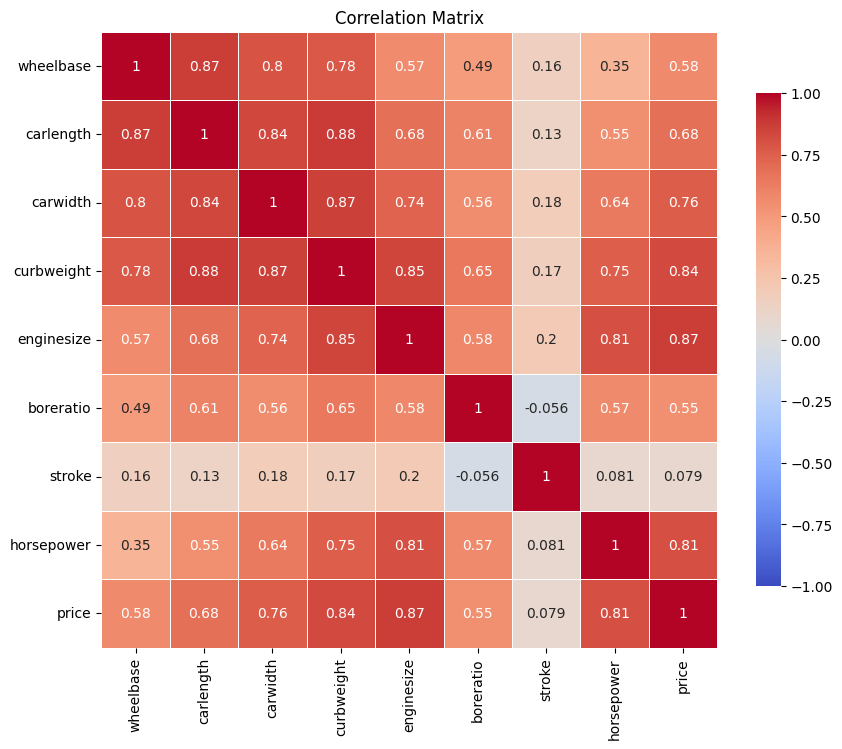

In [16]:
numeric_cols = data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower', 'price']]

cus_viz.heatmap_corr(data=numeric_cols, title='Correlation Matrix', method='pearson')

# 🎉 Congratulations! 🎉

Terima kasih telah mengikuti dan menyelesaikan pelatihan **Exploratory Data Analysis**! 👏

Anda telah berhasil mempelajari berbagai konsep penting dalam explorasi data melalui visualisasi dengan menggunakan bahasa pemrograman Python, mulai dari:
- ✅ Memahami setiap jenis visualisasi dari
  - Bar Chart
  - Line Chart
  - Pie Chart
  - Stacked Bar Chart
  - Boxplot
  - Correlation Matrix
- ✅ Memahami membaca Python file yang berisi function
- ✅ Mempersingkat waktu dengan less code dari function


---